In [1]:
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

import synth_gen

In [2]:
import sys
sys.path.append("../twintest")

import causality as intest
import viz

In [40]:
gps = synth_gen.GPsampler(gamma=10)
f = gps.get_func()

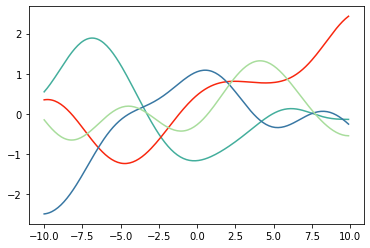

In [41]:
xs = np.arange(-10, 10, 0.1)

plt_vals = []
for i in range(0, 4):
    ys = f(xs)
    c = viz.lighten_color(viz.color_map(i), amount=1.7)
    plt.plot(xs, ys, c=c, alpha=1)


In [42]:
target = 1 # By defaul X->Y
nb_samples = 75

Nx = {'name': 'uniform', 'var': 10}
Ny = {'name': 'normal', 'var': 0.3}

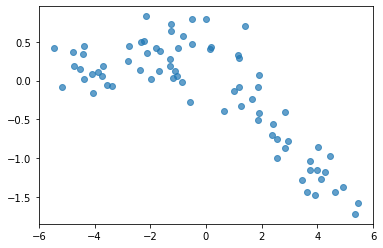

In [53]:
binary_am = synth_gen.BinaryAM(Nx, Ny, f, nb_samples)
x = binary_am.x
y = binary_am.y
viz.pretty_scatter(x, y)

In [60]:
def eval_param(data_param, nb_runs=10):
    acc = 0
    for _ in range(nb_runs):
        x, y = synth_gen.am_from_param(param)
        pred = intest.estimate_effect(x, y) 
        acc += int(pred) # assume pred == 1 <-> correct since X -> Y
    return acc / nb_runs

In [70]:
acc_list = []
for nb_s in [50, 75, 100, 125, 150, 200]:
    data_param = {'Nx': Nx, 'Ny': Ny, 'f':f, 'nb_samples': nb_s}


    acc = eval_param(data_param, nb_runs=100)
    acc_list.append(acc)

In [73]:
plt.plot(acc_list)

TypeError: float() argument must be a string or a number, not '_NoValueType'

<Figure size 432x288 with 0 Axes>

In [74]:
acc_list

[0.85, 0.85, 0.89, 0.85, 0.86, 0.92]

In [75]:
for k in acc_list:
    print(type(k))

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
